In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pickle

from google.colab import drive
drive.mount('/content/drive')

import os


model_dir = '/content/drive/Shareddrives/1:1_Krishna_Vijay/Results/'

print(os.listdir(model_dir))

Mounted at /content/drive
['ABBVscalermodel', 'HPT.gsheet', 'best_model_ABBV.h5', 'ABBVGRU_MODEL', 'best_model_ABBV_GRU.h5', 'NVDAGRU_MODEL', 'MSFTGRU_MODEL', 'best_model_MSFT_GRU.h5', 'best_model_MSFT.h5', 'NVDAscalermodel', 'AMDscalermodel', 'NVDA_scaler.pkl', 'NVDA_columns.txt', 'MSFTscalermodel', 'Models', '.ipynb_checkpoints', 'best_model_NVDA.h5', 'best_model_NVDA_GRU.h5', 'AMD_scaler.pkl', 'AMD_columns.txt', 'best_model_AMD.h5']


In [2]:
LSTM_MODEL_PATH = "/content/drive/Shareddrives/1:1_Krishna_Vijay/Results/"
COMPANY = "AMD"
train_data= pd.read_csv('/content/drive/Shareddrives/1:1_Krishna_Vijay/Dataset/train_AMD.csv')
test_data=pd.read_csv('/content/drive/Shareddrives/1:1_Krishna_Vijay/Dataset/test_AMD.csv')
# Load the saved model
model_path = os.path.join(LSTM_MODEL_PATH, f"best_model_{COMPANY}.h5")
model = tf.keras.models.load_model(model_path)
print("Model loaded.")

import numpy as np
def prepare_seq(data, seq_len):   #eg seq=len = 50
  sequences, labels = [], []

  #len of data is 1353 then 1353 - 50 is the range
  for i in range(len(data) - seq_len):
    #e0 to 50
    x_temp = data.iloc[i:i+seq_len].values
    #stores 50th value
    y_temp = data.iloc[i+seq_len].values

    sequences.append(x_temp)
    labels.append(y_temp)
  return np.array (sequences), np.array(labels)

# define the sequence length
SEQ_LENGTH = 50
# process the dataset
train_sequences, train_labels = prepare_seq(train_data, SEQ_LENGTH)
test_sequences, test_labels = prepare_seq(test_data, SEQ_LENGTH)
print(train_sequences.shape, test_sequences.shape)

Model loaded.
(957, 50, 4) (202, 50, 4)


7/7 [==============================] - 1s 21ms/step
MSE for open: 145.71196120769258
RMSE for open: 12.071120959036596


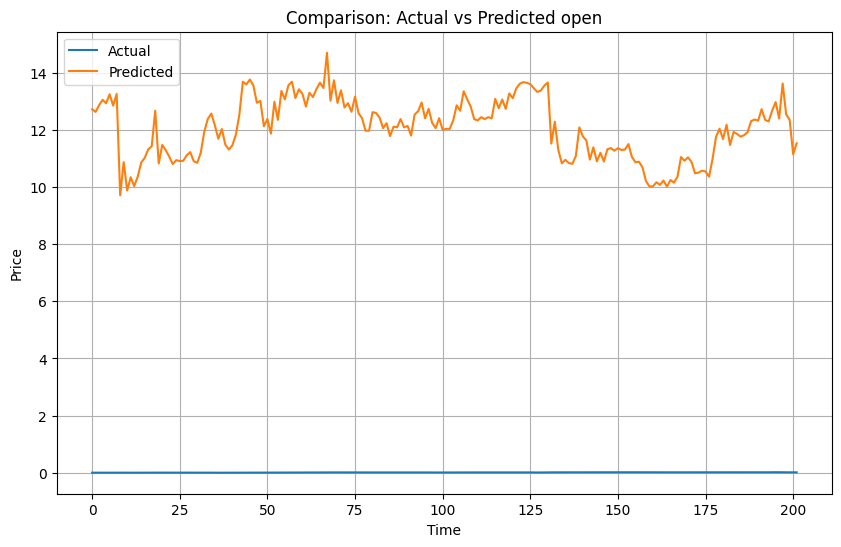

MSE for high: 151.58905472850134
RMSE for high: 12.31215069467968


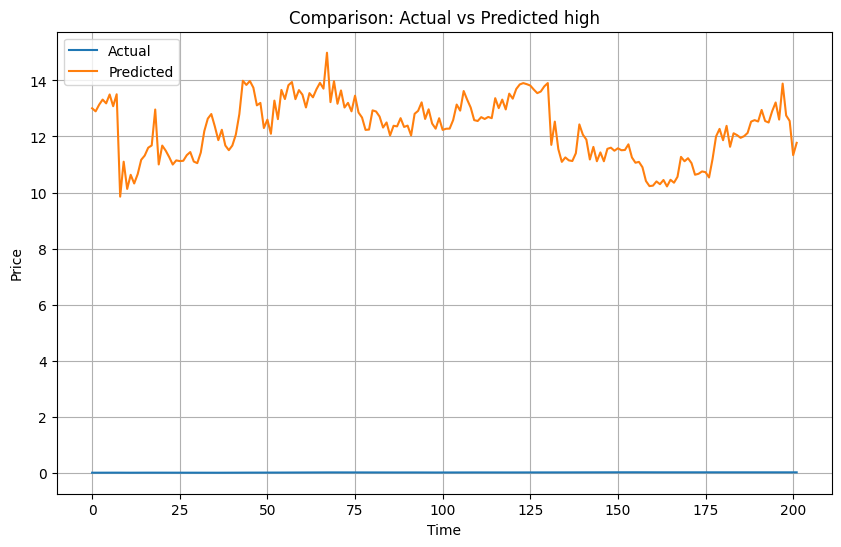

MSE for low: 138.55754644058695
RMSE for low: 11.771046956009773


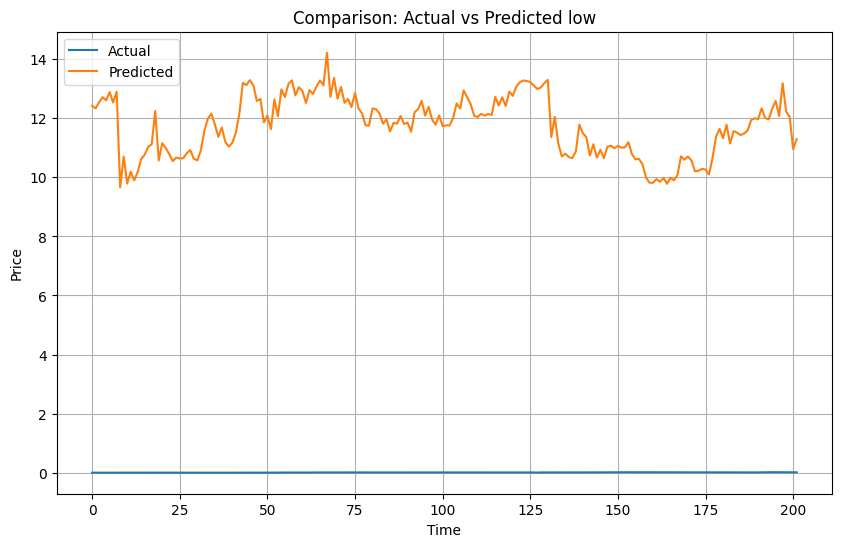

MSE for close: 142.1730982862854
RMSE for close: 11.92363611849529


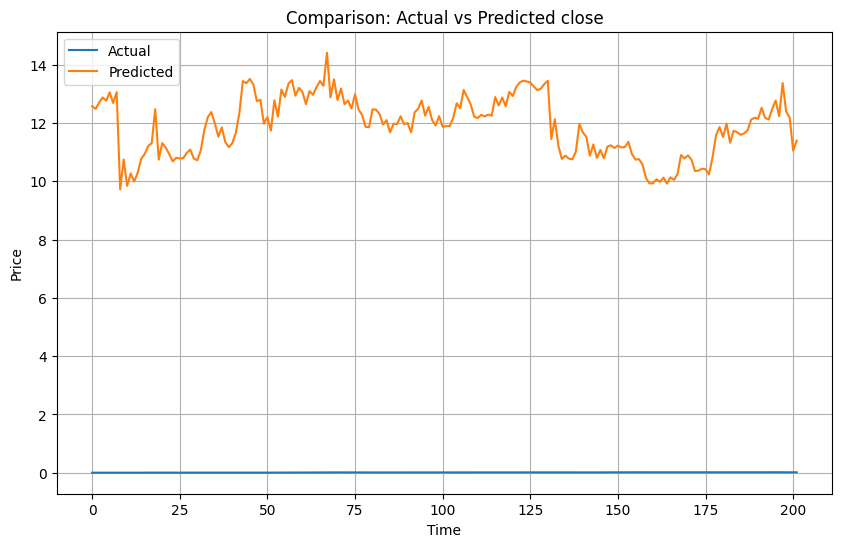

['open', 'high', 'low', 'close']
   open_predicted  high_predicted  low_predicted  close_predicted
0       12.716728       13.006844      12.422650        12.576142
1       12.623587       12.896984      12.335394        12.487338
2       12.861239       13.134459      12.547121        12.704301
3       13.046124       13.318183      12.712851        12.878455
4       12.927910       13.182497      12.606477        12.768772
[[12.716728  13.006844  12.42265   12.576142 ]
 [12.623587  12.896984  12.335394  12.487338 ]
 [12.861239  13.1344595 12.547121  12.704301 ]
 [13.0461235 13.318183  12.712851  12.878455 ]
 [12.92791   13.182497  12.606477  12.768772 ]
 [13.240441  13.499787  12.887837  13.054126 ]
 [12.84414   13.08091   12.532595  12.689199 ]
 [13.252755  13.505976  12.901197  13.059247 ]
 [ 9.708134   9.853532   9.659594   9.723199 ]
 [10.865671  11.100347  10.699732  10.748283 ]
 [ 9.873046  10.128548   9.786564   9.84391  ]
 [10.337165  10.632252  10.19597   10.271973 ]
 [10.02

In [3]:
# Make predictions
df_path = '/content/drive/Shareddrives/1:1_Krishna_Vijay/Dataset/df_NVDA.csv'
df = pd.read_csv(df_path)

# Update COLUMNS based on the actual column names in the CSV file
COLUMNS = df.columns.tolist()

#need to fix NOT WORKING
predictions = model.predict(test_sequences)

scaler_path = os.path.join(LSTM_MODEL_PATH, f"{COMPANY}_scaler.pkl")
with open(scaler_path, 'rb') as file:
    scaler = pickle.load(file)

inverse_predictions = scaler.inverse_transform(predictions)

PRED_COLUMNS = ['open_predicted', 'high_predicted', 'low_predicted', 'close_predicted']
pred_df = pd.DataFrame(inverse_predictions, columns=PRED_COLUMNS)


def evaluations(actual_df, pred_df):
    # Align the DataFrames by index or ensure they are of the same length
    common_length = min(len(actual_df), len(pred_df))
    actual_df = actual_df.iloc[:common_length]
    pred_df = pred_df.iloc[:common_length]

    cols = actual_df.columns.tolist()
    for i, column in enumerate(cols):
        pred_col = PRED_COLUMNS[i]
        mse = mean_squared_error(actual_df[column].values, pred_df[pred_col].values)
        print(f"MSE for {column}: {mse}")
        print(f"RMSE for {column}: {np.sqrt(mse)}")

        plt.figure(figsize=(10, 6))
        plt.plot(actual_df.index, actual_df[column], label="Actual")
        plt.plot(pred_df.index, pred_df[pred_col], label="Predicted")
        plt.xlabel("Time")
        plt.ylabel(f"Price")
        plt.title(f"Comparison: Actual vs Predicted {column}")
        plt.legend()
        plt.grid(True)
        plt.show()

# Call the evaluation function
evaluations(df, pred_df)

print(COLUMNS)
print(pred_df.head())
print(inverse_predictions)